In [100]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from arch import arch_model

## Simple models bis

This file will try to make a quick prediction with other models than coming from `SARIMA` that we saw in class.

Data read with shape (101705, 555) and stored in variable df
Dataset organized by domain stored in variable df_domains.
Domain names: Index(['zh', 'fr', 'en', 'de', 'ru', 'nt', 'ja', 'es'], dtype='object')


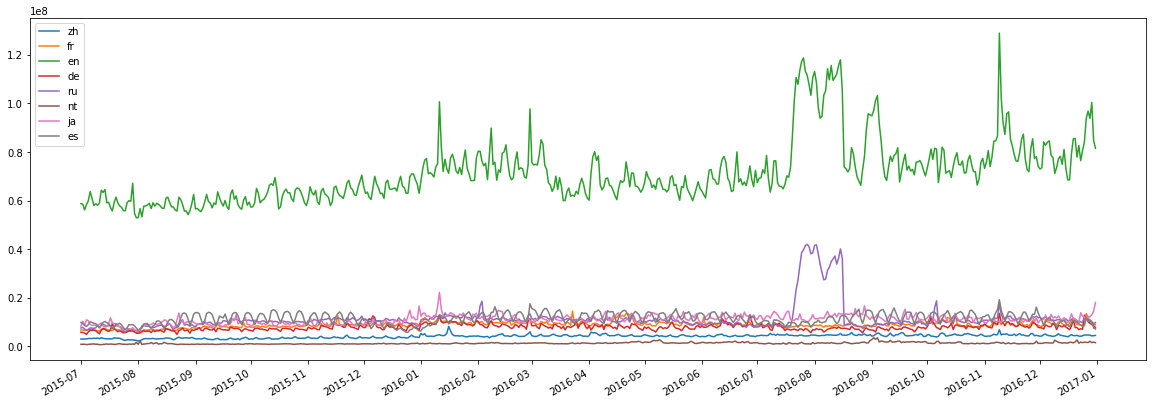

2015-07-01     58717099.0
2015-07-02     58552962.0
2015-07-03     56132615.0
2015-07-04     58336401.0
2015-07-05     59882234.0
                 ...     
2016-12-27     96801861.0
2016-12-28     93852316.0
2016-12-29    100378373.0
2016-12-30     84622309.0
2016-12-31     81530405.0
Freq: D, Name: en, Length: 550, dtype: float64

In [1]:
%run data_domains.ipynb
series = df_domains['en'].astype('float64').asfreq('d')
series

In [7]:
series_normalized = (series-series.mean())/series.std()

The *mean smoothing* won't give us any good results with our series (with almost any series), the first interesting model we could use is an *average mean smoothing* which can detect the trend, seasonality of a series. Our series is a bit more complex this is why the first model tried is the *Triple Exponential Smoothing* (one and double can't extract trend and seasonality at same time).

In [12]:
TEST_SIZE = 0.8
N = len(series)
idx = int(N*TEST_SIZE)
series_train = series_normalized[:idx]
series_test = series_normalized[idx:]

In [13]:
triple = ExponentialSmoothing(series_train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=7).fit(optimized=True)
triple_preds = triple.forecast(len(series_test))
triple_mse = ((series_test - triple_preds)**2).mean()

print("MSE: ", triple_mse)

MSE:  0.5840812147597658


In [31]:
def plot_results(y_pred,title='Plot'):
    fig,ax = plt.subplots(figsize=(15,7))
    ax.set(title=title,xlabel='Date',ylabel='Number of accesses')
    series_train.plot(ax=ax, style='k-', label="train")
    series_test.plot(ax=ax, color='blue', linestyle="--", label="test")
    ax.plot(series_test.index, y_pred, 'r--', label="predictions")
    ax.legend(loc='upper left')
    plt.show()

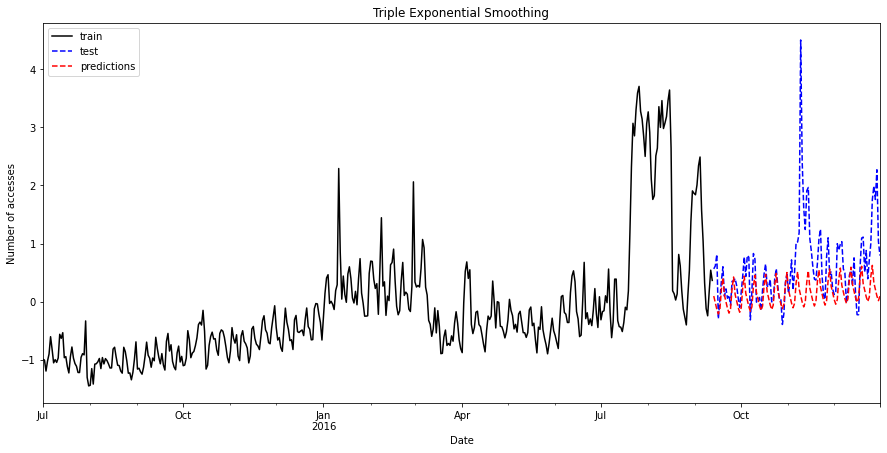

In [32]:
plot_results(triple_preds,title='Triple Exponential Smoothing')

The seasonality and trend is well detected. Of course every noise or spikes don't influence at all the model which lead to more error than a `SARIMA` model. This still can give a good first idea on how the series can follow in the future.